In [20]:
# try:
#     from APMonitor.apm import *
# except:
#     # Automatically install APMonitor
#     import pip
#     pip.main(['install','APMonitor'])
#     from APMonitor.apm import *

In [5]:
z1 = apm_solve('2nd_order',4)

apm 47.157.245.145_2nd_order_8190 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:            360
 Number of total equations: -          360
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 ----------------------------------------------
 Dynamic Simulation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  1.58478E-18  1.00000E+00
    1  1.45058E-33  1.14965E-01
    2  1.45058E-33  1.14965E-01
 Su

In [21]:
from scipy.integrate import odeint
import numpy as np

In [36]:
def model(x,t,m,k,a,b):
    y=x[0]
    dy =x[1]
    #K = 30
    xdot = [[],[]]
    xdot[0] = dy
#     xdot[1] = -(0.9+0.7*t)*dy-K*y
    xdot[1] = (-k*y+a*dy-b*(dy)**3)/m
    return xdot
time = np.linspace(0,40,100)
z2 = odeint(model,[0.01,0],time,args=(9984,9984,9984,9984))
z3 = odeint(model,[0.01,0],time,args=(7000,9984,9984,9984))
z4 = odeint(model,[0.01,0],time,args=(9984,7000,9984,9984))
z5 = odeint(model,[0.01,0],time,args=(9984,9984,7000,9984))
z6 = odeint(model,[0.01,0],time,args=(9984,9984,9984,7000))


In [23]:
import matplotlib.pyplot as plt

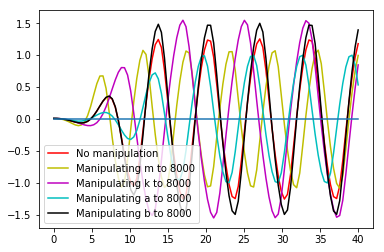

In [38]:
# plt.plot(z1['time'],z1['y'],'r-')
# plt.plot(z1['time'],z1['dy'],'b--')
plt.plot(time,z2[:,0],'r')
plt.plot(time,z3[:,0],'y')
plt.plot(time,z4[:,0],'m')
plt.plot(time,z5[:,0],'c')
plt.plot(time,z6[:,0],'k')
plt.plot([0,40],[0,0])
# plt.plot(time,z2[:,1],'k-.')
plt.legend(['No manipulation','Manipulating m to 8000',
           'Manipulating k to 8000','Manipulating a to 8000',
            'Manipulating b to 8000'])


